In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

In [29]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
3


In [30]:
# ヒートマップの描画関数
def draw_pcm(partial_corr_matrix):
    plt.figure(figsize=(20, 10))

    ax = sns.heatmap(partial_corr_matrix, 
                annot=True, 
                fmt='g', 
                cmap='Blues', 
                annot_kws={"size":7})

    sns.set(font_scale = 2)

    ax.xaxis.tick_top()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

    plt.savefig('./output/heatmap.png')

In [31]:
df = pd.read_excel('../data/230828_230904_AI用qPCRデータ.xlsx', index_col=0, header=1)
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.head()

glk           agp      yihX           pgm      ptsG          malx  \
0  0.000004  2.982088e-05  0.000004  1.512045e-05  0.000015  9.403729e-07   
1  0.000008  3.062644e-05  0.000016  2.940716e-08  0.000015  3.847846e-06   
2  0.000008  7.608227e-06  0.000016  1.396326e-08  0.000031  9.615077e-07   
3  0.000004  1.513944e-05  0.000015  1.225795e-07  0.000015  4.807837e-07   
4  0.000008  4.768491e-07  0.000031  6.105349e-08  0.000031  9.593193e-07   

        crr      galM          yihR      yeaD  ...      tpiA      gapA  \
0  0.000122  0.000015  4.792578e-07  0.000007  ...  0.000008  0.000121   
1  0.000124  0.000015  3.848767e-06  0.000015  ...  0.000015  0.000123   
2  0.000245  0.000015  4.864569e-07  0.000031  ...  0.000015  0.000122   
3  0.000124  0.000015  1.207673e-07  0.000008  ...  0.000015  0.000061   
4  0.000124  0.000015  2.428970e-07  0.000016  ...  0.000016  0.000124   

            pgk      gpmA      ytjc      gpmM       eno      pykF      pykA  \
0  1.193258e-07  0.000119  0.000004  0.000008  0.000015  0.000030  0.000015   
1  2.377373e-07  0.000123  0.000008  0.000016  0.000031  0.000061  0.000031   
2  9.666787e-07  0.000122  0.000008  0.000016  0.000062  0.000062  0.000031   
3  2.410427e-07  0.000061  0.000004  0.000008  0.000031  0.000062  0.000031   
4  4.795912e-07  0.000124  0.000008  0.000008  0.000031  0.000062  0.000031   

       ppsA  
0  0.000030  
1  0.000061  
2  0.000062  
3  0.000062  
4  0.000062  

[5 rows x 33 columns]

In [32]:
# 偏相関行列の計算
partial_corr_matrix = pg.pcorr(df).round(3)
partial_corr_matrix.head()

glk    agp   yihX    pgm   ptsG   malx    crr   galM   yihR   yeaD  \
glk   1.000  0.101  0.199  0.271 -0.198 -0.165 -0.129 -0.026 -0.112 -0.077   
agp   0.101  1.000 -0.060  0.136  0.015  0.075  0.379  0.231  0.154 -0.186   
yihX  0.199 -0.060  1.000 -0.044  0.129  0.151  0.126  0.203  0.057  0.112   
pgm   0.271  0.136 -0.044  1.000  0.377  0.252  0.219 -0.012  0.189  0.041   
ptsG -0.198  0.015  0.129  0.377  1.000 -0.085 -0.098 -0.087  0.144  0.201   

      ...   tpiA   gapA    pgk   gpmA   ytjc   gpmM    eno   pykF   pykA  \
glk   ...  0.207 -0.044 -0.081 -0.158  0.567  0.252  0.018  0.065 -0.075   
agp   ...  0.174  0.087  0.273  0.105 -0.056 -0.220  0.015  0.096  0.051   
yihX  ...  0.100  0.017  0.162 -0.140 -0.063 -0.260  0.038  0.100  0.040   
pgm   ... -0.327  0.500  0.145 -0.031 -0.306 -0.220  0.132 -0.130 -0.028   
ptsG  ...  0.100 -0.168 -0.142 -0.113  0.236  0.010 -0.097  0.094  0.044   

       ppsA  
glk  -0.139  
agp   0.031  
yihX -0.201  
pgm  -0.012  
ptsG -0.121  

[5 rows x 33 columns]

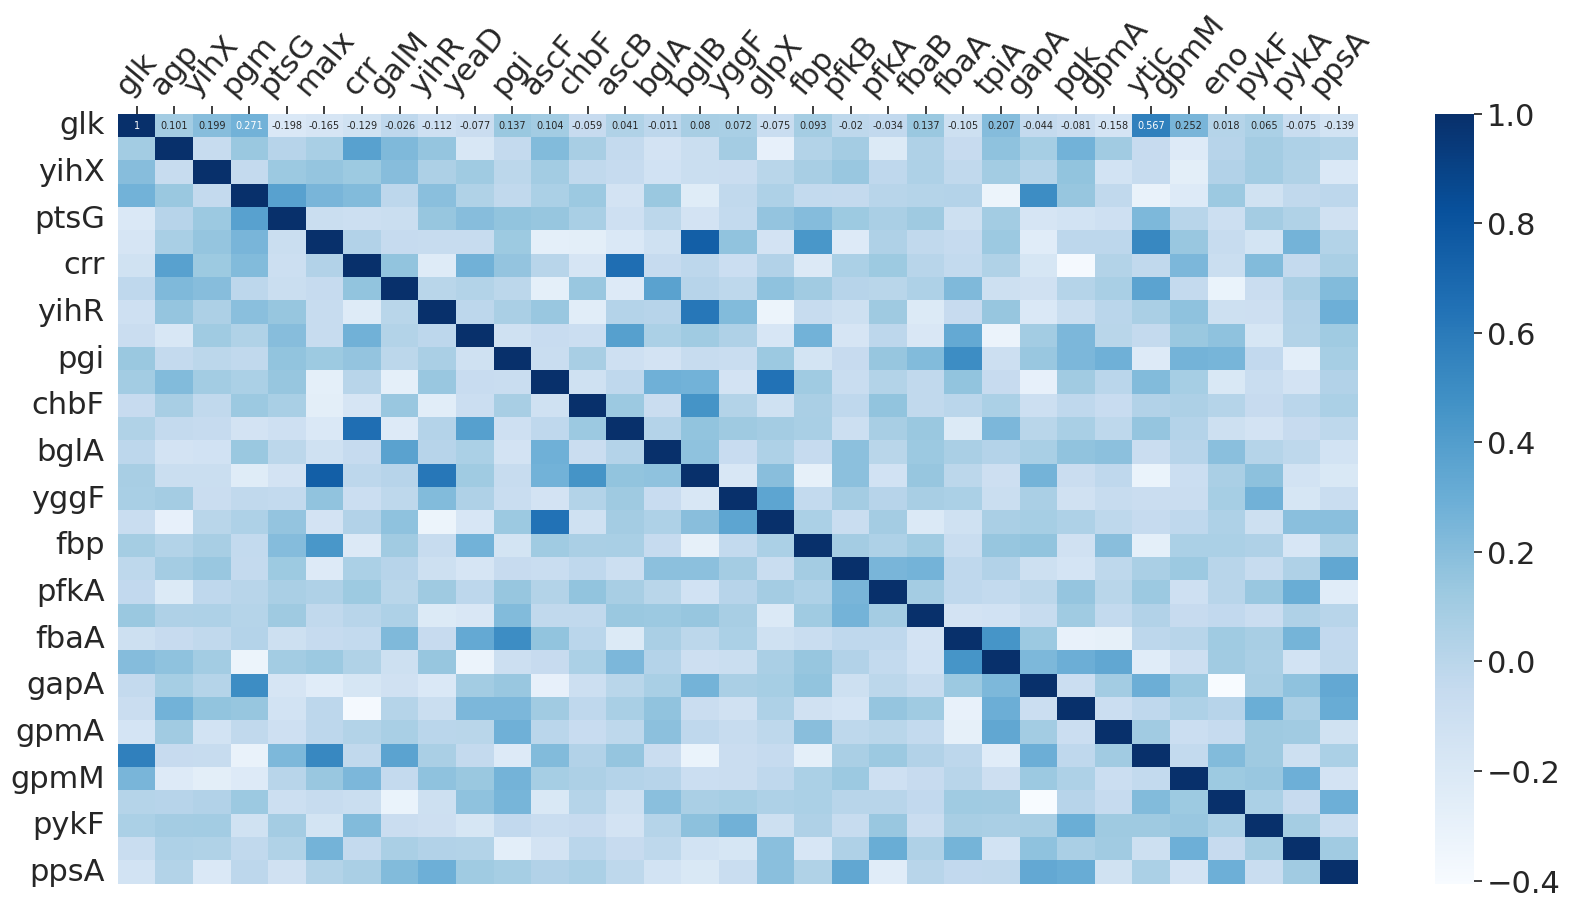

In [33]:
draw_pcm(partial_corr_matrix)

In [34]:
# yとの相関係数を表示
corr_y = pd.DataFrame({"features":df.columns,"corr_y":partial_corr_matrix["ascF"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

In [35]:
# 連続値 →　離散値に変更
df_new = df.copy()

for i in range(len(df_new.columns)):
    df_new.iloc[:, i] = pd.qcut(df_new.iloc[:, i], 2)
    # contingency_table = pd.crosstab(df_new[])

df_new

glk                       agp  \
0    (-0.00099629, 1.53e-05]  (-0.000999523, 3.06e-05]   
1    (-0.00099629, 1.53e-05]       (3.06e-05, 0.00049]   
2    (-0.00099629, 1.53e-05]  (-0.000999523, 3.06e-05]   
3    (-0.00099629, 1.53e-05]  (-0.000999523, 3.06e-05]   
4    (-0.00099629, 1.53e-05]  (-0.000999523, 3.06e-05]   
..                       ...                       ...   
126  (-0.00099629, 1.53e-05]       (3.06e-05, 0.00049]   
127  (-0.00099629, 1.53e-05]       (3.06e-05, 0.00049]   
128  (-0.00099629, 1.53e-05]       (3.06e-05, 0.00049]   
129  (-0.00099629, 1.53e-05]  (-0.000999523, 3.06e-05]   
130  (-0.00099629, 1.53e-05]       (3.06e-05, 0.00049]   

                        yihX                         pgm  \
0    (-0.00099631, 1.57e-05]        (1.13e-05, 0.000245]   
1    (-0.00099631, 1.57e-05]  (-0.00099999236, 1.13e-05]   
2    (-0.00099631, 1.57e-05]  (-0.00099999236, 1.13e-05]   
3    (-0.00099631, 1.57e-05]  (-0.00099999236, 1.13e-05]   
4       (1.57e-05, 0.000496]  (-0.00099999236, 1.13e-05]   
..                       ...                         ...   
126  (-0.00099631, 1.57e-05]        (1.13e-05, 0.000245]   
127     (1.57e-05, 0.000496]        (1.13e-05, 0.000245]   
128     (1.57e-05, 0.000496]        (1.13e-05, 0.000245]   
129     (1.57e-05, 0.000496]  (-0.00099999236, 1.13e-05]   
130     (1.57e-05, 0.000496]        (1.13e-05, 0.000245]   

                        ptsG                      malx  \
0    (-0.00099613, 3.14e-05]  (-0.000999762, 1.93e-06]   
1    (-0.00099613, 3.14e-05]      (1.93e-06, 0.000494]   
2       (3.14e-05, 0.000502]  (-0.000999762, 1.93e-06]   
3    (-0.00099613, 3.14e-05]  (-0.000999762, 1.93e-06]   
4       (3.14e-05, 0.000502]  (-0.000999762, 1.93e-06]   
..                       ...                       ...   
126     (3.14e-05, 0.000502]      (1.93e-06, 0.000494]   
127     (3.14e-05, 0.000502]      (1.93e-06, 0.000494]   
128     (3.14e-05, 0.000502]      (1.93e-06, 0.000494]   
129  (-0.00099613, 3.14e-05]  (-0.000999762, 1.93e-06]   
130  (-0.00099613, 3.14e-05]      (1.93e-06, 0.000494]   

                        crr                                galM  \
0    (-0.0009697, 0.000123]  (-0.0009981200000000001, 1.53e-05]   
1       (0.000123, 0.00398]                (1.53e-05, 0.000245]   
2       (0.000123, 0.00398]  (-0.0009981200000000001, 1.53e-05]   
3       (0.000123, 0.00398]                (1.53e-05, 0.000245]   
4       (0.000123, 0.00398]                (1.53e-05, 0.000245]   
..                      ...                                 ...   
126     (0.000123, 0.00398]                (1.53e-05, 0.000245]   
127     (0.000123, 0.00398]                (1.53e-05, 0.000245]   
128     (0.000123, 0.00398]                (1.53e-05, 0.000245]   
129  (-0.0009697, 0.000123]  (-0.0009981200000000001, 1.53e-05]   
130  (-0.0009697, 0.000123]                (1.53e-05, 0.000245]   

                          yihR                     yeaD  ...  \
0    (-0.0009999401, 4.83e-07]  (-0.00099841, 7.81e-06]  ...   
1         (4.83e-07, 0.000492]     (7.81e-06, 0.000505]  ...   
2         (4.83e-07, 0.000492]     (7.81e-06, 0.000505]  ...   
3    (-0.0009999401, 4.83e-07]  (-0.00099841, 7.81e-06]  ...   
4    (-0.0009999401, 4.83e-07]     (7.81e-06, 0.000505]  ...   
..                         ...                      ...  ...   
126       (4.83e-07, 0.000492]     (7.81e-06, 0.000505]  ...   
127       (4.83e-07, 0.000492]     (7.81e-06, 0.000505]  ...   
128       (4.83e-07, 0.000492]     (7.81e-06, 0.000505]  ...   
129       (4.83e-07, 0.000492]  (-0.00099841, 7.81e-06]  ...   
130       (4.83e-07, 0.000492]  (-0.00099841, 7.81e-06]  ...   

                        tpiA                     gapA  \
0    (-0.00099841, 1.55e-05]     (6.23e-05, 0.000983]   
1       (1.55e-05, 0.000499]     (6.23e-05, 0.000983]   
2    (-0.00099841, 1.55e-05]     (6.23e-05, 0.000983]   
3    (-0.00099841, 1.55e-05]  (-0.00099254, 6.23e-05]   
4       (1.55e-05, 0.000499]     (6.23e-05, 0.00098

In [36]:
from pgmpy.estimators import PC

pc = PC(df_new)
model = pc.estimate()

Working for n conditional variables: 0:   0%|          | 0/5 [00:00<?, ?it/s]/home/yarita/.local/lib/python3.9/site-packages/pgmpy/estimators/CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/home/yarita/.local/lib/python3.9/site-packages/pgmpy/estimators/CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/home/yarita/.local/lib/python3.9/site-packages/pgmpy/estimators/CITests.py:540: FutureWarning: The default of observed=False is deprecated and w

In [37]:
from pyvis import network as net
import networkx as nx

edge_list = list(model.edges())
edge_list = [i + tuple([0.1]) for i in edge_list]#ウェイトの値を適当に追加

#jupyter中に表示させる場合、notebook=True, →にする場合directed=True
got_net = net.Network(notebook=True,directed=True)

for e in edge_list:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])
    
got_net.show_buttons(True)

got_net.show('./output/gameofthrones.html')

./output/gameofthrones.html
